```
 ______________   ______   __       @..@    古池や
 |____/|____|| \  ||   \\_/        (----)    蛙飛び込む
 |R  \_|A   ||N \_||D__/ |Y       ( >__< )    水の音
```

In [ ]:
%config Completer.use_jedi = False

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import randy

In [3]:
SAMPLES = 1_000

## Sigma Random

Permutates `loc` with a given `strength` in order to get a value between `a` and `b`. If `strength` = `0`, simply returns `loc`; if `loc` is `None` or `strength` = `1`, returns a random number in `[a, b]` with uniform probability. Based on the [truncated normal distribution](https://en.wikipedia.org/wiki/Truncated_normal_distribution) from [scypy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html).

The function `random(a, b)` is equivalent to `sigma_random(a, b, loc=None, strength=None)`

In [4]:
stat = pd.DataFrame()
for s in np.linspace(0, 1, num=6):
    samples = [randy.sigma_random(a=2, b=10, loc=4, strength=s) for _ in range(SAMPLES)]
    stat[f'{s:g}'] = samples

(0.0, 100.0)

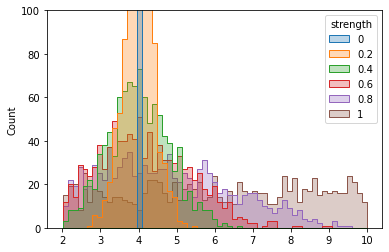

In [5]:
fig, ax = plt.subplots()
sns.histplot(stat, element='step', stat='count', common_norm=False, alpha=.3, ax=ax)
ax.legend_.set_title("strength")
ax.set_ylim(0, SAMPLES/10)

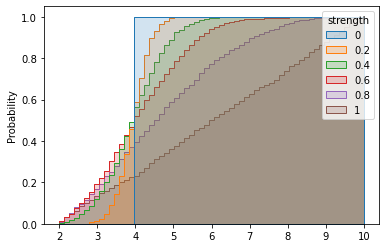

In [6]:
fig, ax = plt.subplots()
sns.histplot(stat, element='step', stat='probability', cumulative=True, common_norm=False, alpha=.2, ax=ax)
ax.legend_.set_title("strength")

## Sigma Choice

Permutates the index `loc` with a given `strength` and returns the corresponding element from the sequence `seq`. If `strength` = `0`, simply returns `seq[loc]`; if `loc` is `None` or `strength` = `1`, returns a random element with uniform probability. Based on the `sigma_random`.

The function `choice(seq)` is equivalent to `sigma_choice(seq, loc=None, strength=None)`

In [7]:
seq = list("ABCDEF")

data = list()
for s in np.linspace(1, 0, num=6):
    samples = [randy.sigma_choice(seq, loc=2, strength=s) for _ in range(SAMPLES)]
    df = pd.DataFrame()
    df[f'letter'] = samples
    df['strength'] = int(s*10)/10
    data.append(df)
stat = pd.concat(data)

<AxesSubplot:xlabel='letter', ylabel='count'>

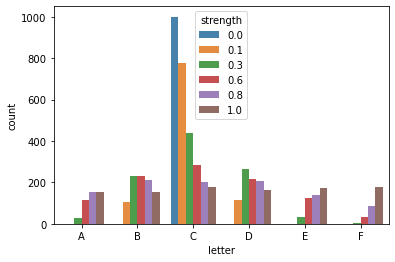

In [8]:
sns.countplot(x='letter', hue='strength', data=stat, order=seq, alpha=.9)

## Boolean

Returns a boolean value with a probability `p_true` to be `True`, or `p_false` to be `False`. Arguments are optional, by default `p_true` = `p_false` = `1/2`.

In [32]:
data = list()
for s in np.linspace(0, 1, num=6):
    samples = [randy.boolean(p_true=s) for _ in range(SAMPLES)]
    df = pd.DataFrame()
    df[f'boolean'] = samples
    df['p'] = int(s*10)/10
    data.append(df)
stat = pd.concat(data)

<AxesSubplot:xlabel='boolean', ylabel='count'>

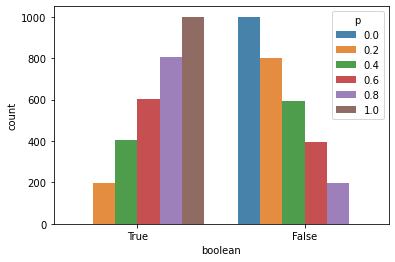

In [33]:
sns.countplot(x='boolean', hue='p', data=stat, order=[True, False], alpha=.9)

## Randint

Returns a random integer in `[a, b]` with uniform probability.

<AxesSubplot:ylabel='count'>

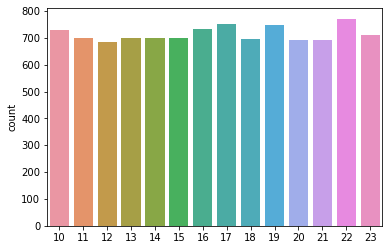

In [46]:
samples = [randy.randint(a=10, b=23) for _ in range(10*SAMPLES)]
sns.countplot(x=samples)

## Shuffle

Modifies the sequence `seq` in-place by shuffling its contents.

In [49]:
data = list("ABCDEFG")
samples = list()
for _ in range(SAMPLES):
    randy.shuffle(data)
    samples.append(tuple(data))

In [60]:
stat = pd.DataFrame(samples)
#fig, ax = plt.subplots()
#sns.histplot(stat, stat='count', common_norm=False, alpha=.3, ax=ax)
#ax.legend_.set_title("strength")
#ax.set_ylim(0, SAMPLES/10)
sns.countplot(data=stat[0])

ValueError: could not convert string to float: 'G'

In [56]:
stat

,0,1,2,3,4,5,6
0,G,A,F,B,D,C,E
1,E,F,B,D,A,G,C
2,F,B,G,D,C,E,A
3,F,D,B,A,C,G,E
4,B,G,F,C,E,D,A
...,...,...,...,...,...,...,...
995,A,F,G,B,E,C,D
996,C,G,E,A,B,D,F
997,B,E,F,G,D,C,A
998,E,G,A,B,D,C,F
